In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # from matplotlib import pyplot as plt
%matplotlib inline

### Plot a function

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

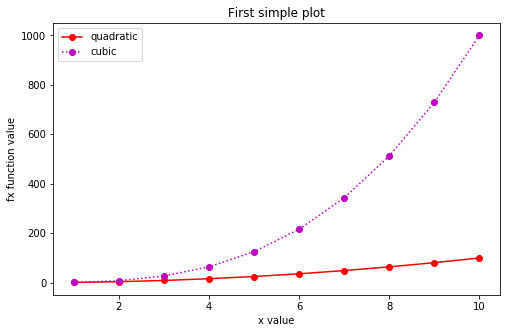

In [5]:
x = np.linspace(1, 10, 10)  # generate data

plt.figure(figsize=(8,5))
# set data to plot
plt.plot(x, x**2, label='quadratic', color='r', marker='o')  # y= x**2
# color='m'= magenta/yello, marke='x/0'
plt.plot(x, x**3, ':mo', label='cubic')

# set x, y axis label
plt.xlabel('x value')
plt.ylabel('fx function value')

plt.title('First simple plot')

plt.legend()
plt.show()

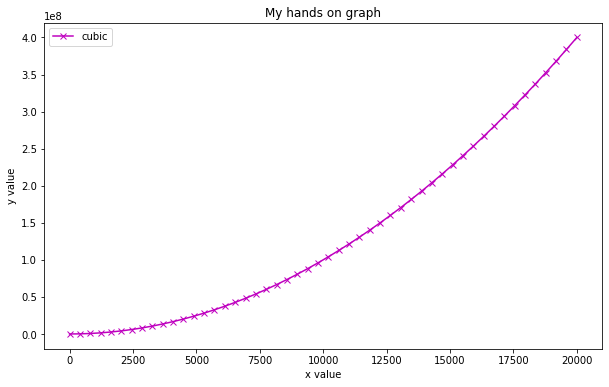

In [12]:
z = np.linspace(1,20000,50) # generate data from 1 to 20 with 50 elements

#figsize(float, float), optional, default: None
#width, height in inches. If not provided, defaults to rcParams["figure.figsize"] 
#(default: [6.4, 4.8]) = [6.4, 4.8].
#SET THE SIZE OF THE FIGURE
plt.figure(figsize=(10,6))
#set data to plot
plt.plot(z,z**2, label="cubic", color='m', marker='x')
#set the x,y axis lable
plt.xlabel('x value')
plt.ylabel('y value')

plt.title('My hands on graph')

plt.legend()
plt.show()

In [5]:
x = np.linspace(1,10,20)

#### Sub plot

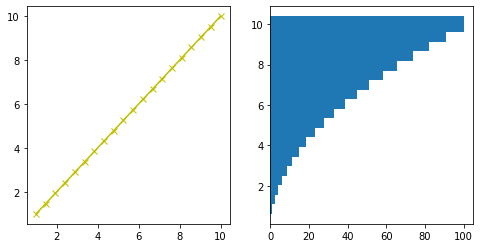

In [7]:
_, ax = plt.subplots(1,2, figsize=(8,4))  # create 2 sub figures with size 10,8
ax[0].plot(x, x, '-yx')   #default color, dash line
ax[1].barh(x, x**2)
plt.show()

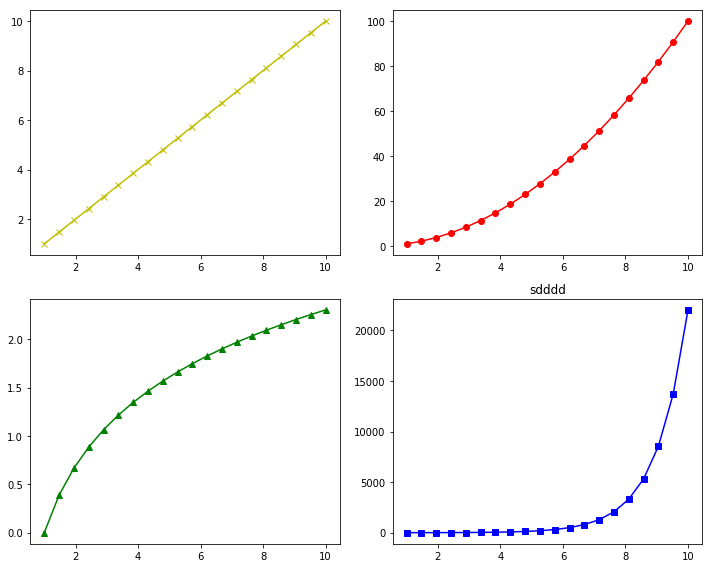

In [73]:
# plt.figure(figsize=(8,10))  # set figure size
_, ax = plt.subplots(2,2, figsize=(10,8))  # create 4 sub figures with size 10,8
ax[0,0].plot(x, x, '-yx')   #default color, dash line
ax[0,1].plot(x, x**2, '-ro')  #red color, circle
ax[1,0].plot(x, np.log(x), '-g^')  #green color, triangle
ax[1,1].plot(x, np.exp(x), '-bs')  # blue, square
plt.tight_layout()
plt.show()

### Plot line from data

In [11]:
df = pd.read_csv('../data/epldata_final.csv')
df.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


                   market_value  page_views
club                                       
Manchester+United        514.10      453.84
Arsenal                  550.00      392.78
Chelsea                  553.55      354.76
Liverpool                440.50      322.73
Manchester+City          564.00      294.87


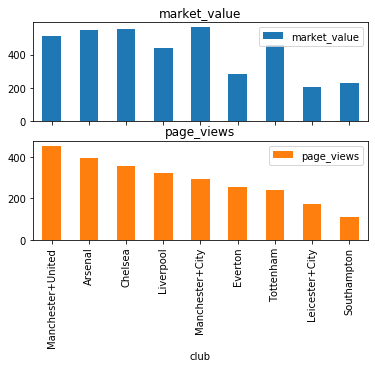

In [13]:
# df = pd.read_csv('epldata_final.csv')
#Tổng giá trị market value của toàn bộ cầu thủ thuộc 1 clb
mv = df[['club','market_value','page_views']].groupby('club').agg('sum')

mv['page_views'] = mv['page_views']/100

mv = mv[mv.market_value > 200]
mv = mv.sort_values(by=['page_views'], ascending=False)

print(mv.head())

# _, ax = plt.subplots(1,2, figsize=(15,8))
# ax[0.plot(mv.index, mv['market_value'], '--g^',label='market value')
# plt.grid(True)
mv.plot(kind='bar', subplots=True) # if subplots = False: draw 2 bar graph at once
plt.legend()
plt.show()

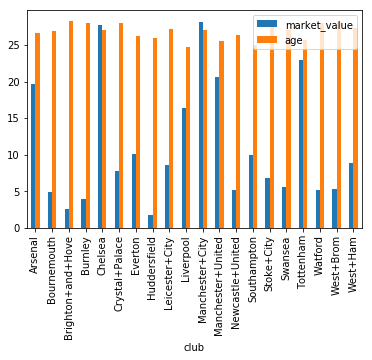

In [12]:
mv1 = df[['club','market_value','age']].groupby('club').agg('mean')
# mv1.head()
mv1.plot(kind='bar')
plt.legend()
plt.show()

market_value    553.55
page_views      354.76
Name: Chelsea, dtype: float64


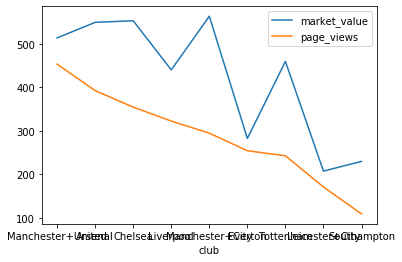

In [16]:
print(mv.loc['Chelsea'])
mv.plot()
#plt.legend() # to show the name of club
plt.show()

### Scatter

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html#matplotlib.pyplot.scatter

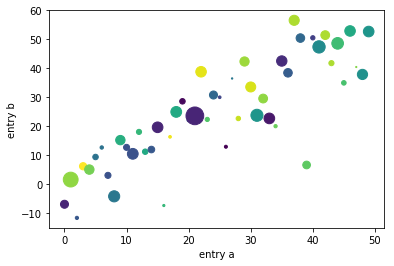

In [75]:
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

plt.scatter(data['a'], data['b'], c=data['c'], s=data['d'])  #scatter x, y, color, size of point
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

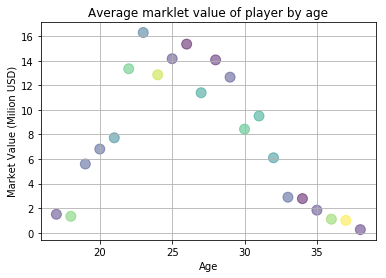

In [17]:
df1 = df[['age','market_value']].groupby('age').agg('mean')
c = df1.shape[0] 
plt.scatter(df1.index, df1.market_value, c=np.random.randint(0, c , c), s=100, alpha=0.5)
plt.grid(True)
plt.xlabel('Age')
plt.ylabel('Market Value (Milion USD)')
plt.title('Average marklet value of player by age')
plt.show()

In [15]:
df1

,market_value
age,
17,1.500000
18,1.333333
19,5.593750
20,6.807692
21,7.724000
22,13.342105
23,16.291667
24,12.848485
25,14.160714


### Bar

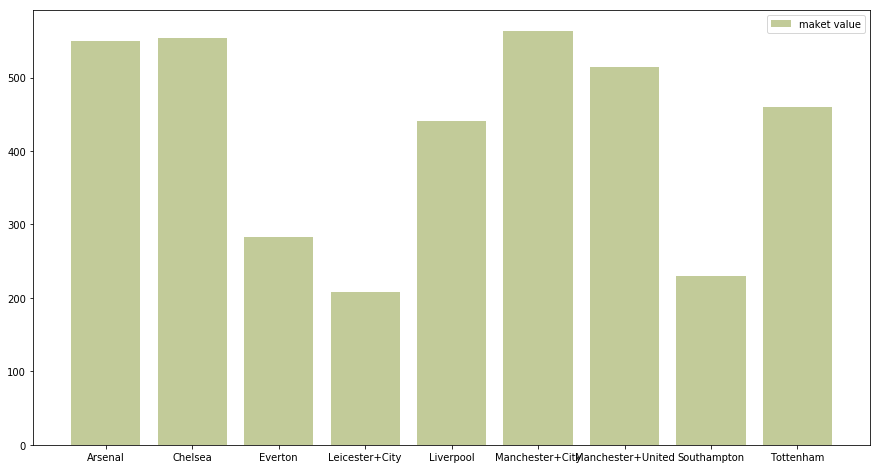

In [32]:

plt.figure(figsize=(15,8))
plt.bar(mv.index, mv['market_value'], label='maket value', color=(0.7,0.75,0.5,0.8))
plt.legend()
plt.show()

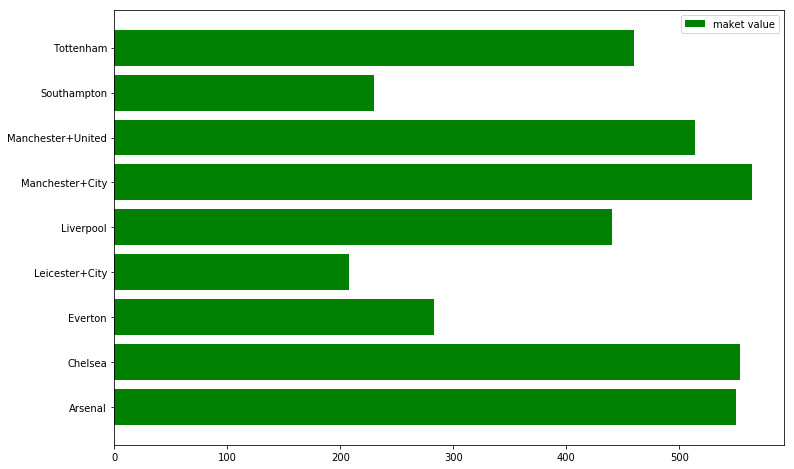

In [88]:
plt.figure(figsize=(12,8))
plt.barh(mv.index, mv['market_value'], label='maket value', color='g')
plt.legend()
plt.show()

### Histogram

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

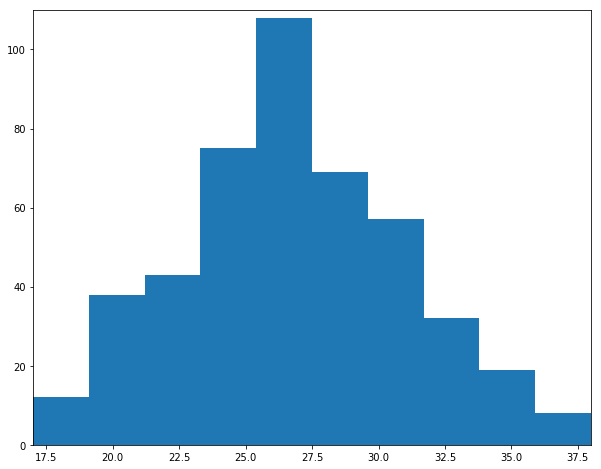

In [37]:
plt.figure(figsize=(10,8))
plt.hist(df['age'])
plt.axis([17, 38, 0, 110])  # set viewport of the axes.
plt.show()

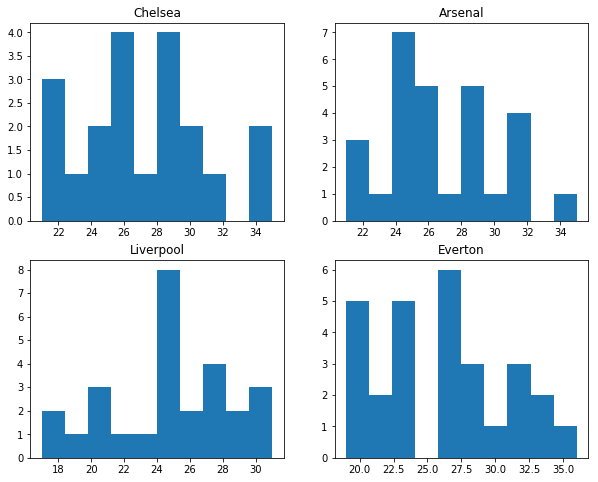

In [17]:
_, ax = plt.subplots(2,2, figsize=(10,8))
ax[0,0].hist(df[df.club=='Chelsea']['age'])
ax[0,0].set_title('Chelsea')
ax[0,1].hist(df[df.club=='Arsenal']['age'])
ax[0,1].set_title('Arsenal')
ax[1,0].hist(df[df.club=='Liverpool']['age'])
ax[1,0].set_title('Liverpool')
ax[1,1].hist(df[df.club=='Everton']['age'])
ax[1,1].set_title('Everton')
plt.show()
# df[df.club=='Chelsea']['age']

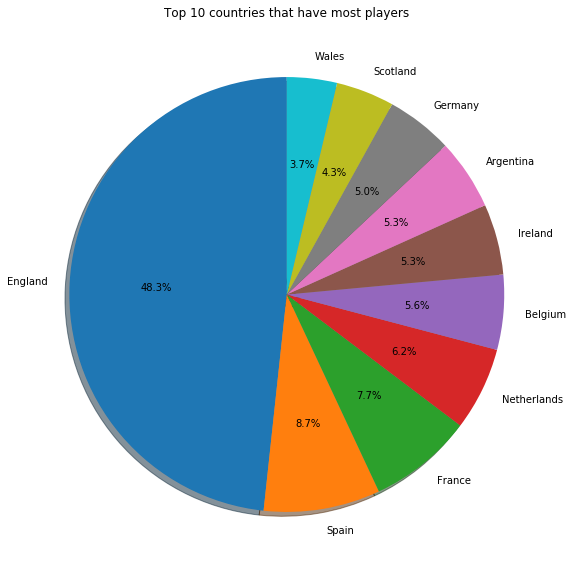

In [25]:
df3 = df[['name', 'nationality']].groupby('nationality').agg('count')
df3 = df3.sort_values(by=['name'], ascending=False)

plt.figure(figsize=(10,10))
plt.pie(df3.head(10), labels=df3.head(10).index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Top 10 countries that have most players')

plt.show()

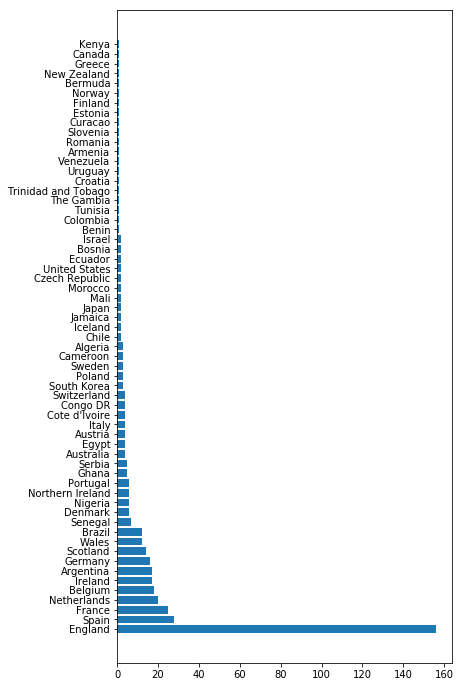

In [34]:
plt.figure(figsize=(6,12))
plt.barh(df3.index, df3['name'])
plt.show()

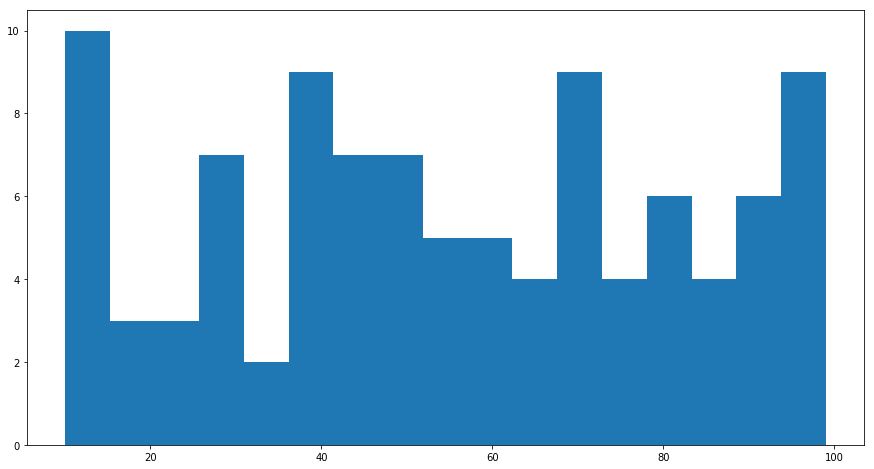

In [69]:
d = np.random.randint(10, 100, 100)
bins = int((max(d)-min(d))/5)
plt.figure(figsize=(15,8))
plt.hist(d, histtype='bar', bins=bins)
plt.show()

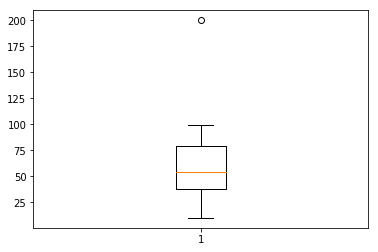

In [70]:
d = np.append(d,200)
plt.boxplot(d,showfliers=True)
plt.show()

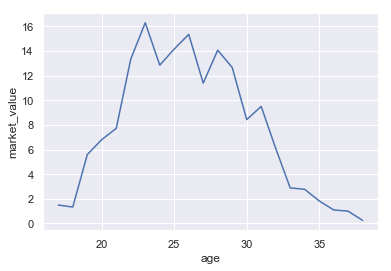

In [85]:
import seaborn as sns
sns.set(style="darkgrid")
sns.lineplot(x=df1.index, y='market_value', data=df1)
plt.show()

In [50]:
import folium
# from geopy.geocoders import Nominatim
# geolocator = Nominatim(user_agent="DSP_test")
# location = geolocator.geocode("36 Nguyen Gia Tri, Binh Thanh, Ho Chi Minh")

m = folium.Map(location=[10.823099, 106.629662], zoom_start=10)
folium.Marker(
    [10.823099, 106.629662],
    popup='36 Nguyen Gia Tri, Binh Thanh'
).add_to(m)
m